# Assignment 2 - EE229

### Subham Agrawal - 23B3919

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

In [46]:
def get_continuous_sinusoid(a, F0, phi, interval, Fc=10000):
    duration = interval / 1000  # Converts duration from ms to seconds
    t = np.arange(0, duration, 1/Fc)  # Time array
    y = a * np.cos(2 * np.pi * F0 * t + phi)  # Sinusoid formula
    return t, y

In [47]:
def plot_magnitude_spectrum(signal, Fc=10000):
    """
    Computes and plots the magnitude spectrum of a signal.

    Parameters:
        signal (ndarray): The input signal.
        Fc (int): Sampling frequency, default 10000 Hz.
    """
    # Number of points in the signal
    N = len(signal)
    
    # Computing the FFT
    spectrum = np.fft.fft(signal)
    
    # Calculating frequency bins
    freqs = np.fft.fftfreq(N, d=1/Fc)
    
    # Calculating the magnitude
    magnitude = np.abs(spectrum)
    
    # Plotting the magnitude spectrum
    plt.figure(figsize=(10, 4))
    plt.plot(freqs[:N//2], magnitude[:N//2])  # Plot only the positive frequencies
    plt.title('Magnitude Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, 4000)  # Limit x-axis to show frequencies up to 4000 Hz
    plt.grid(True)
    plt.show()

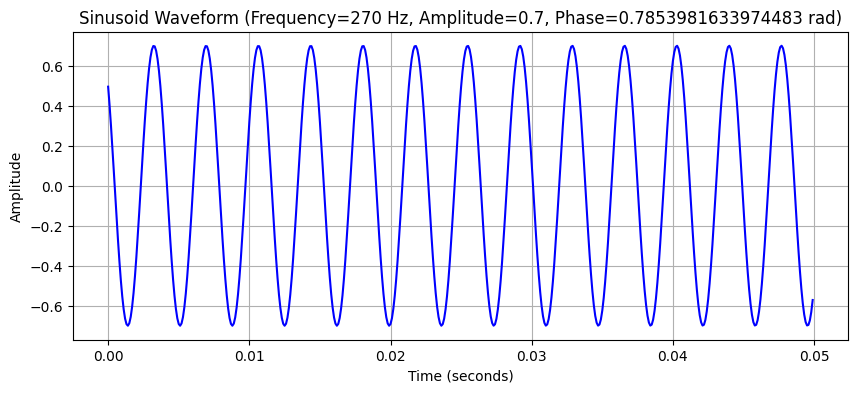

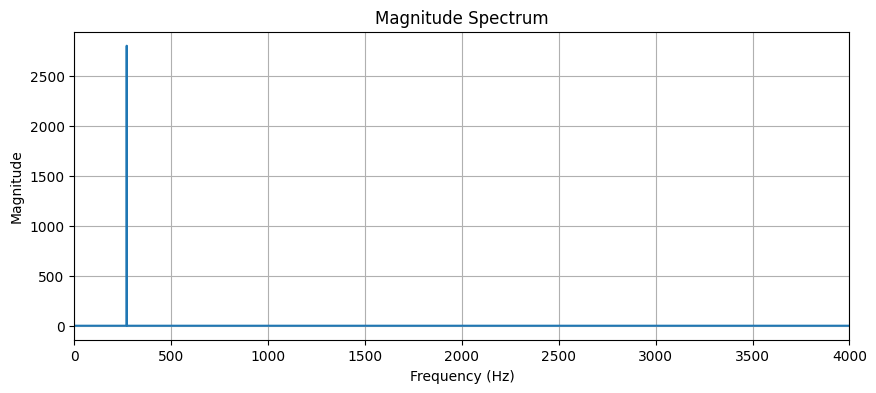

In [48]:
# Example parameters for the sinusoid
F0 = 270       # Frequency in Hz
a = 0.7        # Amplitude (between 0 and 1)
phi = np.pi/4  # Phase in radians
interval = 800 # Duration in ms

# Generating the sinusoid using the function
t, y = get_continuous_sinusoid(a, F0, phi, interval)


# Plotting the first 0.05 seconds of the sinusoid waveform
plt.figure(figsize=(10, 4))
plt.plot(t[:int(0.05 * 10000)], y[:int(0.05 * 10000)], color='b')  # Showing only the first 0.05 seconds
plt.title(f'Sinusoid Waveform (Frequency={F0} Hz, Amplitude={a}, Phase={phi} rad)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plotting the magnitude spectrum of the generated sinusoid
plot_magnitude_spectrum(y, Fc=10000)

# Playing the sinusoid
Audio(data=y, rate=10000)  # Fc = 10000 Hz

In [49]:
def generate_harmonic_waveform(a, F0, phi, interval, harmonics, Fc=10000):
    """
    Generates a waveform by adding harmonics to the fundamental frequency.

    Parameters:
        a (float): Amplitude of the fundamental frequency.
        F0 (float): Fundamental frequency in Hz.
        phi (float): Phase of the fundamental frequency in radians.
        interval (float): Duration of the waveform in ms.
        harmonics (list of tuples): Each tuple contains (amplitude, multiple, phase) for a harmonic.
        Fc (int): Sampling frequency, default 10000 Hz.

    Returns:
        t (ndarray): Time array.
        y (ndarray): Waveform with added harmonics.
    """
    duration = interval / 1000  # Convert ms to seconds
    t = np.arange(0, duration, 1/Fc)  # Time array
    y = a * np.cos(2 * np.pi * F0 * t + phi)  # Start with the fundamental frequency

    # Adding each harmonic
    for amp, multiple, phase in harmonics:
        y += amp * np.cos(2 * np.pi * F0 * multiple * t + phase)

    return t, y

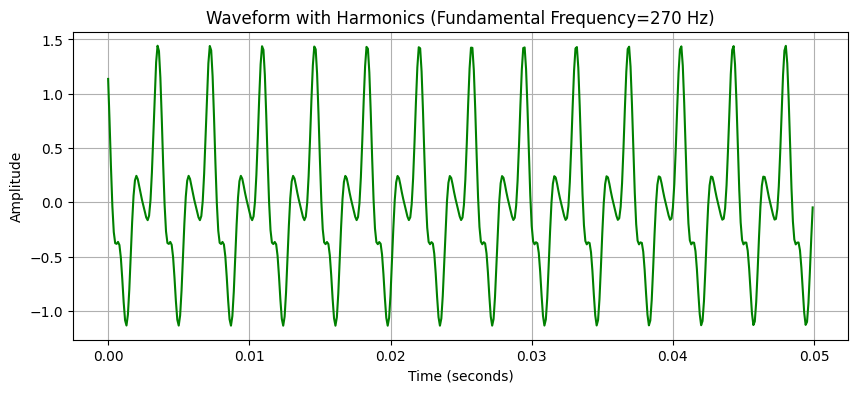

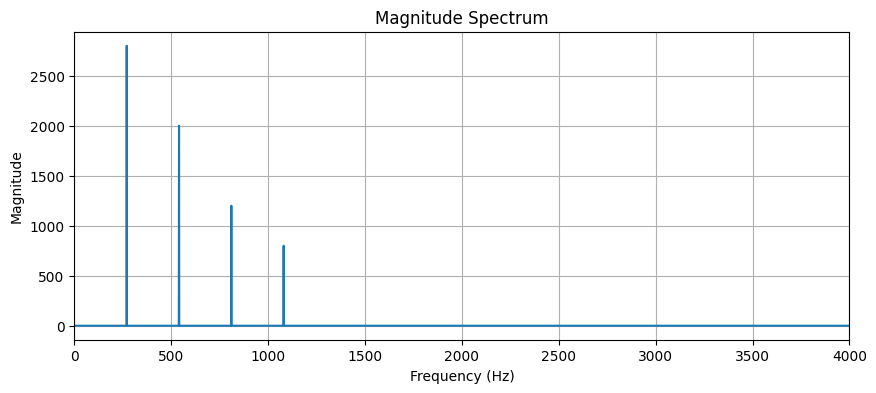

In [50]:
# Parameters for the fundamental frequency
F0 = 270       # Fundamental frequency in Hz
a = 0.7        # Amplitude of the fundamental
phi = np.pi/4  # Phase for the fundamental
interval = 800 # Duration in ms

# Defining harmonics: (amplitude, harmonic multiple, phase)
harmonics = [
    (0.5, 2, 0),            # 2nd harmonic, half the amplitude of the fundamental
    (0.3, 3, np.pi/2),      # 3rd harmonic, smaller amplitude, phase shift of π/2
    (0.2, 4, np.pi/4)       # 4th harmonic, even smaller amplitude, phase shift of π/4
]

# Generating waveform with harmonics
t, y_harmonics = generate_harmonic_waveform(a, F0, phi, interval, harmonics)

# Plotting the waveform with harmonics
plt.figure(figsize=(10, 4))
plt.plot(t[:int(0.05 * 10000)], y_harmonics[:int(0.05 * 10000)], color='g')
plt.title(f'Waveform with Harmonics (Fundamental Frequency={F0} Hz)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

plot_magnitude_spectrum(y_harmonics, Fc=10000)

# Playing the waveform
Audio(data=y_harmonics, rate=10000)

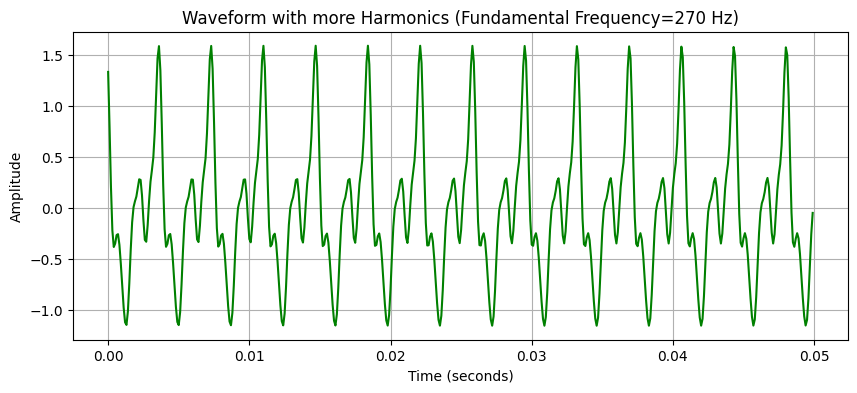

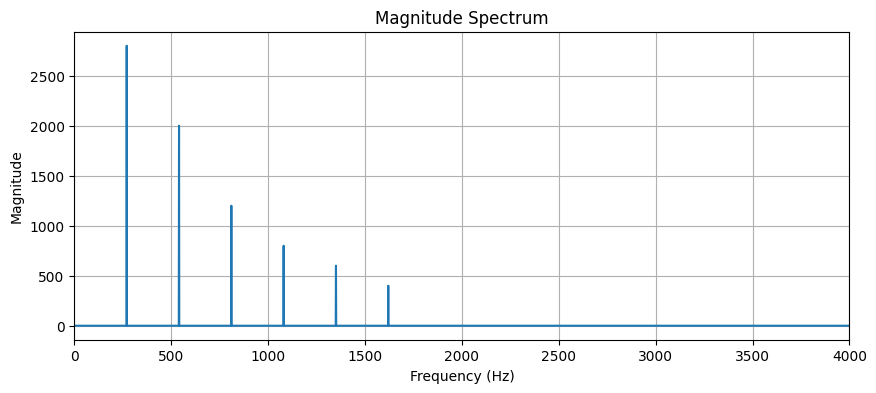

In [51]:
# Parameters for the fundamental frequency
F0 = 270       # Fundamental frequency in Hz
a = 0.7        # Amplitude of the fundamental
phi = np.pi/4  # Phase for the fundamental
interval = 800 # Duration in ms

# Defining harmonics: (amplitude, harmonic multiple, phase)
harmonics = [
    (0.5, 2, 0),            # 2nd harmonic, half the amplitude of the fundamental
    (0.3, 3, np.pi/2),      # 3rd harmonic, smaller amplitude, phase shift of π/2
    (0.2, 4, np.pi/4),      # 4th harmonic, even smaller amplitude, phase shift of π/4
    (0.15, 5, 0),           # 5th harmonic, smaller amplitude, no phase shift
    (0.1, 6, np.pi/3)       # 6th harmonic, even smaller amplitude, phase shift of π/3
]

# Generating waveform with harmonics
t, y_harmonics2 = generate_harmonic_waveform(a, F0, phi, interval, harmonics)

# Plotting the waveform with harmonics
plt.figure(figsize=(10, 4))
plt.plot(t[:int(0.05 * 10000)], y_harmonics2[:int(0.05 * 10000)], color='g')
plt.title(f'Waveform with more Harmonics (Fundamental Frequency={F0} Hz)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

plot_magnitude_spectrum(y_harmonics2, Fc=10000)

# Playing the waveform
Audio(data=y_harmonics2, rate=10000)

### Adding more harmonics does make the sound richer!

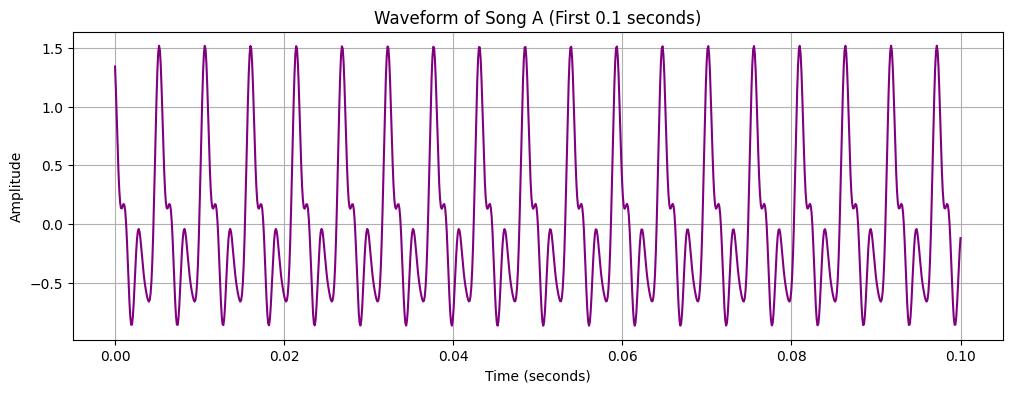

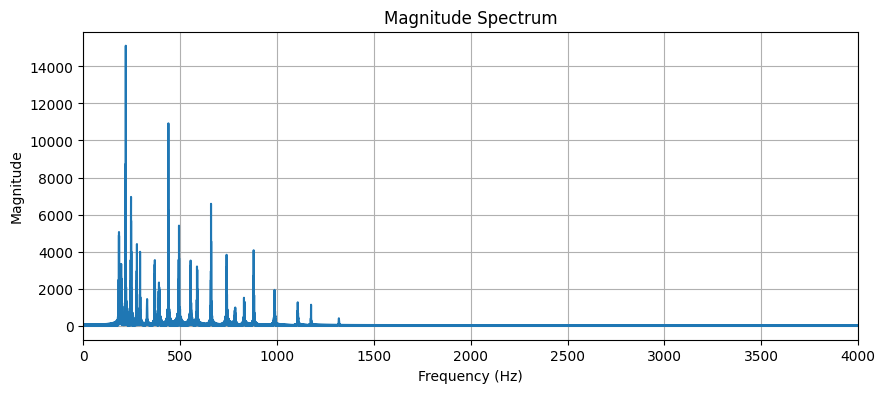

In [52]:
def play_song(song_notes, harmonics, Fc=10000):
    
    full_song = np.array([])  # Initialize empty array for the full song
    
    for (F0, duration) in song_notes:
        # Generate waveform for each note with harmonics
        _, note_wave = generate_harmonic_waveform(a=0.7, F0=F0, phi=0, interval=duration, harmonics=harmonics, Fc=Fc)
        full_song = np.concatenate((full_song, note_wave))  # Append the note to the full song

    return full_song

# Defining the sequence of notes for Song A (frequency in Hz, duration in ms)
song_A_notes = [
    (185, 200), (196, 200), (220, 400), (220, 400), (247, 400), (247, 400), (220, 600), (196, 200), (185, 400),
    (185, 200), (196, 200), (220, 400), (220, 400), (247, 400), (247, 400), (220, 600), (196, 200), (185, 400),
    (185, 200), (196, 200), (220, 400), (220, 400), (247, 400), (277, 400), (294, 800),
    (294, 400), (330, 400), (277, 400), (277, 400), (247, 400), (277, 200), (247, 400), (220, 800)
]

# Defining harmonics (amplitude, harmonic multiple, phase) for the timbre
harmonics = [
    (0.5, 2, 0),            # 2nd harmonic
    (0.3, 3, np.pi/2),      # 3rd harmonic
    (0.2, 4, np.pi/4)       # 4th harmonic
]

# Generating the waveform for the full song
song_waveform = play_song(song_A_notes, harmonics, Fc=10000)

# Defining a short duration for the plot (e.g., first 0.1 seconds)
plot_duration = 0.1  # seconds
samples_to_plot = int(plot_duration * 10000)  # Convert to number of samples based on Fc=10000

# Plotting an short section of the waveform
plt.figure(figsize=(12, 4))
plt.plot(np.linspace(0, plot_duration, samples_to_plot), song_waveform[:samples_to_plot], color='purple')
plt.title('Waveform of Song A (First 0.1 seconds)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plotting the magnitude spectrum for Song B
plot_magnitude_spectrum(song_waveform, Fc=10000)

# Playing the song
Audio(data=song_waveform, rate=10000)

#### The song is "Hum Honge Kamyab" written by Girija Kumar Mathur!

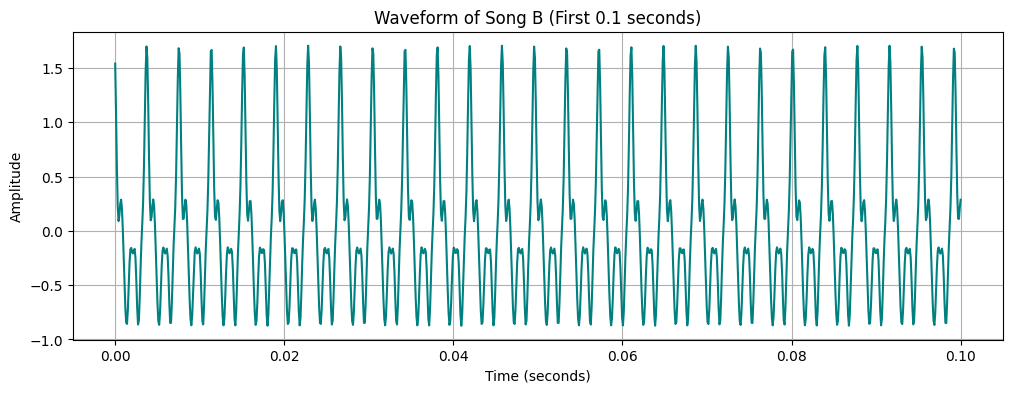

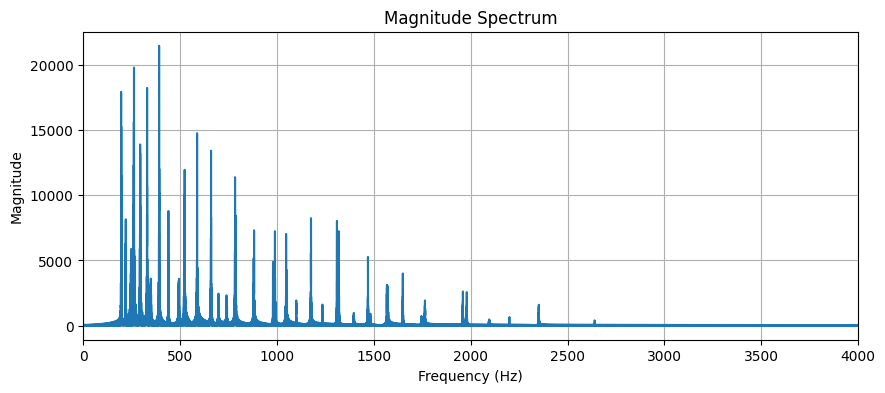

In [53]:
# Defining the sequence of notes for Song B (frequency in Hz, duration in ms)
song_B_notes = [
    (262, 200), (294, 200), (294, 200), (330, 1000), (294, 200), (262, 200), (294, 400), (392, 800),
    (349.23, 200), (330, 200), (262, 800), (220, 800), (196, 1200),
    (262, 200), (294, 200), (294, 200), (330, 1000), (294, 200), (262, 200), (294, 400), (392, 800),
    (330, 200), (392, 200), (440, 800), (392, 800), (294, 1600),
    (262, 600), (262, 200), (262, 400), (262, 400), (247, 400), (262, 800), (262, 400), (247, 400),
    (262, 800), (294, 400), (330, 800), (294, 800), (262, 600), (262, 200), (262, 400), (262, 400), (247, 400),
    (262, 800), (262, 400), (196, 3200),
    (262, 1600), (294, 1200), (196, 400), (392, 800), (349.23, 400), (330, 400), (294, 800), (330, 400),
    (349.23, 400), (330, 1200), (294, 200), (262, 200), (247, 400), (262, 800), (247, 400), (220, 1600),
    (196, 1600)
]

# Defining new harmonics for a different timbre (amplitude, harmonic multiple, phase)
harmonics_B = [
    (0.5, 2, 0),           # 2nd harmonic
    (0.3, 3, np.pi/2),     # 3rd harmonic
    (0.2, 4, np.pi/4),     # 4th harmonic
    (0.15, 5, 0),          # 5th harmonic
    (0.1, 6, np.pi/3)      # 6th harmonic
]

# Generating waveform for Song B using the play_song function
song_B_waveform = play_song(song_B_notes, harmonics_B, Fc=10000)

# Plotting a short section of the waveform (first 0.1 seconds)
plot_duration = 0.1  # seconds
samples_to_plot = int(plot_duration * 10000)  # Converting to number of samples

plt.figure(figsize=(12, 4))
plt.plot(np.linspace(0, plot_duration, samples_to_plot), song_B_waveform[:samples_to_plot], color='teal')
plt.title('Waveform of Song B (First 0.1 seconds)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plotting the magnitude spectrum for Song B
plot_magnitude_spectrum(song_B_waveform, Fc=10000)

# Playing Song B
Audio(data=song_B_waveform, rate=10000)

#### The song is "My Heart Will Go On" sung by Celine Dion from the movie Titanic!

In [54]:
from scipy.io import wavfile

# Normalize and save Song 1 with Timbre 1
scaled_song_waveform = np.int16(song_waveform / np.max(np.abs(song_waveform)) * 32767)
wavfile.write("Song 1 - Timbre 1.wav", 10000, scaled_song_waveform)

# Normalize and save Song 2 with Timbre 2
scaled_song_B_waveform = np.int16(song_B_waveform / np.max(np.abs(song_B_waveform)) * 32767)
wavfile.write("Song 2 - Timbre 2.wav", 10000, scaled_song_B_waveform)

# Normalize and save Timbre 1 sinusoid
scaled_y_harmonics = np.int16(y_harmonics / np.max(np.abs(y_harmonics)) * 32767)
wavfile.write("Timbre 1.wav", 10000, scaled_y_harmonics)

# Normalize and save Timbre 2 sinusoid
scaled_y_harmonics2 = np.int16(y_harmonics2 / np.max(np.abs(y_harmonics2)) * 32767)
wavfile.write("Timbre 2.wav", 10000, scaled_y_harmonics2)

# Normalize and save Fundamental Sinusoid
scaled_y = np.int16(y / np.max(np.abs(y)) * 32767)
wavfile.write("Sinusoid.wav", 10000, scaled_y)